<a href="https://colab.research.google.com/github/sonyirawan492/praktikum-2/blob/main/praktikum_2_Sony_irawan_G_231_21_0008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

codingan ini untuk mengimpor data dari laptop ke google colab

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv
Saving train.csv to train.csv


codingan yg di bawah digunakan untuk membaca file CSV yang telah di import di dalam google colab

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


codingan ini digunakan untuk mengidentifkasi baris baris yang merupahkan duplikat dalam sebuah DataFrame pandas

In [3]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

dalam pandas digunakan untuk menampilkan informasi singkat tentang DataFrame, termasuk jumlah nol-null(non-kosong) entri dalam setiap kolom, tipe data kolom, penggunan memori dan sebagainya.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


codingan ini di gunakan untuk memperlihatkan statik deskriftip singkat dari DataFrame

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


digunakan untuk mengidentifikasi dan mencetak kolom-kolom kategoris (kolom dengan tipe data 'object') dalam sebuah DataFrame.

In [6]:
cat_col = [col for col in df.columns if df [col].dtype == 'object']
print('Categorical columns :',cat_col)
num_col = [col for col in df.columns if df [col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


digunakan untuk menghitung jumlah nilai unik(jumlah kategori unik) dalam kolom kolom kategoris yang ada dalam DataFrame df.

In [7]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

digunakan untuk mendapatkan 50 nilai unik pertama dalam kolom 'Ticket' dari DataFrame df.

In [8]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

Drop Name and Ticket columns

In [9]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

Handling missing data

In [10]:
round((df1.isnull().sum()/df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Codingan ini digunakan untuk menghasilkan DataFrame baru (df2) dari DataFrame df1 dengan menghapus kolom 'Cabin' dan menghapus baris-baris yang memiliki nilai yang hilang (NaN) dalam kolom 'Embarked'.

In [11]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

Codingan ini digunakan untuk mengisi nilai-nilai yang hilang (NaN) di dalam DataFrame df2 dengan nilai rata-rata dari kolom 'Age'.

In [12]:
df3 = df2.fillna(df2.Age.mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Heandling outliers

Kode ini digunakan untuk membuat diagram boxplot menggunakan pustaka Matplotlib untuk kolom 'Age' dari DataFrame df3. Diagram boxplot adalah alat yang berguna untuk memvisualisasikan distribusi data dan mengidentifikasi pencilan (outliers).



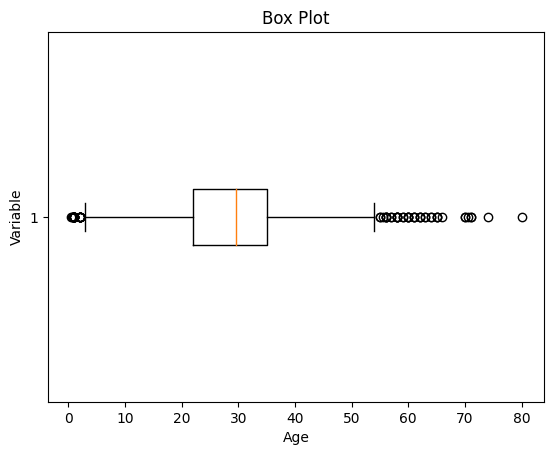

In [13]:
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

Kode ini digunakan untuk menghitung batas bawah dan batas atas berdasarkan rata-rata dan deviasi standar dari kolom 'Age' dalam DataFrame df3. Kemudian, menggunakan batas tersebut, Anda membuat DataFrame df4 yang hanya berisi baris-baris yang memiliki nilai 'Age' yang berada dalam rentang antara batas bawah dan batas atas.

In [14]:
mean = df3['Age'].mean()
std  = df3['Age'].std()

lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('upper Bound :',upper_bound)

df4 = df3[(df3['Age'] >= lower_bound)
                & (df3['Age'] <= upper_bound)]

Lower Bound : 3.7054001079256587
upper Bound : 55.57878528533277


Data Transformation

Kode ini digunakan untuk membagi DataFrame df3 menjadi dua bagian: X yang berisi fitur-fitur yang digunakan untuk prediksi (dalam hal ini 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', dan 'Embarked') dan Y yang berisi target prediksi ('Survived').

In [16]:
X=df3[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y=df3['Survived']

Kode from sklearn.preprocessing import MinMaxScaler digunakan untuk mengimpor kelas MinMaxScaler dari modul sklearn.preprocessing. MinMaxScaler adalah salah satu metode normalisasi yang digunakan untuk mengubah fitur atau variabel numerik ke dalam rentang antara 0 dan 1.

In [17]:
from sklearn.preprocessing import MinMaxScaler

#initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
#learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

<ipython-input-17-a361c0a3a1ab>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


HANDLING IMBALANCED DATA

condingan ini untuk mengimport data dari pc ke google colab

In [18]:
#import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


Codingan ini digunakan untuk membaca file csv yang telah di import ke dalam google colab

In [19]:
#load the data set
data = pd.read_csv('creditcard.csv')

#print info about columns in the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                                --------------  ----- 
 0   Time,"V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"  999 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB
None


Kode ini digunakan untuk membuat kolom baru 'normAmount' dalam DataFrame data yang berisi nilai-nilai 'Amount' yang telah dinormalisasi menggunakan StandardScaler dari scikit-learn. Normalisasi ini mengubah distribusi data 'Amount' ke distribusi standar dengan rata-rata 0 dan deviasi standar 1.

In [ ]:
#normalise the amount column
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))

#drop Time and Amount columns as they are not relevant for prediction purpose
data = data.drop(['Time','Amount'], axis = 1)

#as you can see there are 492 fraud transactions.
data['Class'].value_counts()

Fungsi ini berguna untuk membagi dataset menjadi dua subset, biasanya untuk melatih model (train set) dan menguji model (test set).

In [ ]:
from sklearn.model_selection import train_test_split

#split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

#describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [ ]:
#logistic regression object
lr = LogisticRegression()

#train the model on train set
lr.fit(X_train, y_train.ravel())

predictions = lr.predict(X_test)

#print classification report
print(classification_report(y_test, predictions))

Using SMOTE Algorithm

Kode ini digunakan untuk mencetak jumlah sampel dengan label '1' (klasifikasi positif) dan jumlah sampel dengan label '0' (klasifikasi negatif) sebelum proses oversampling. Oversampling adalah teknik yang digunakan untuk menyeimbangkan distribusi kelas dalam dataset, khususnya saat Anda memiliki ketidakseimbangan kelas di dalam dataset.

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train ==1)))
print("Before OverSampling, counts of label '0': {}\n".format(sum(y_train ==0)))

#import SMOTE module from imblearn library
#pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [ ]:
#logistic regression object
lr = LogisticRegression()

#train the model on train set
lr.fit(X_train, y_train.ravel())

predictions = lr.preduct(X_test)

#print classification report
print(classification_report(y_test, predictions))


Using SMOTE Algorithm

Kode ini digunakan untuk mencetak jumlah sampel dengan label '1' (klasifikasi positif) dan jumlah sampel dengan label '0' (klasifikasi negatif) sebelum proses oversampling. Oversampling adalah teknik yang digunakan untuk menyeimbangkan distribusi kelas dalam dataset, khususnya saat Anda memiliki ketidakseimbangan kelas di dalam dataset.

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}\n".format(sum(y_train == 0)))

#import SMOTE module from imblearn library
#pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [ ]:
#logistic regression object
lr1 = LogisticRegression()
#train the model on train set
lr1.fit(X_train_res, y_train_res.ravel())

predictions = lr1.predict(X_test)

#print classification report
print(classification_report(y_test, predictions))


NearMiss Algorithm:

Kode ini digunakan untuk mencetak jumlah sampel dengan label '1' (klasifikasi positif) dan jumlah sampel dengan label '0' (klasifikasi negatif) sebelum proses undersampling. Undersampling adalah teknik yang digunakan untuk menyeimbangkan distribusi kelas dalam dataset dengan mengurangi jumlah sampel dari kelas mayoritas.

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {}\n".format(sum(y_train == 0)))

#apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel())
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

In [ ]:
#train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)

#print classification report
print(classification_report(y_test, predictions))
